# Практическая работа №1 
## по предмету "Системы искусственного интеллекта"

В данной практической работе Вы будете работать с базой данных, посвященной баскетболу, которая включает в себя информацию об игроках, играх и командах. 


### Задание 1
Вам необходимо запустить в docker базу данных PostgreSQL и выгрузить туда все данные из файла nba.sqlite, приложенного к лабороторной работе.
Выгрузить данные можно с помощью утилиты pgloader (https://pgloader.readthedocs.io/en/latest/ref/sqlite.html)

### Задание 2

Загрузите данные из таблицы game. Посмотрите, какие есть типы игр в сезоне (season_type) и количество этих игр.

In [36]:
%%sql
select *
from game;


,season_id,team_id_home,team_abbreviation_home,team_name_home,game_id,game_date,matchup_home,wl_home,min,fgm_home,...,reb_away,ast_away,stl_away,blk_away,tov_away,pf_away,pts_away,plus_minus_away,video_available_away,season_type
0,21946,1610610035,HUS,Toronto Huskies,24600001,1946-11-01 00:00:00,HUS vs. NYK,L,0,25.0,...,NaN,NaN,NaN,NaN,NaN,NaN,68,2,0,Regular Season
1,21946,1610610034,BOM,St. Louis Bombers,24600003,1946-11-02 00:00:00,BOM vs. PIT,W,0,20.0,...,NaN,NaN,NaN,NaN,NaN,25.0,51,-5,0,Regular Season
2,21946,1610610032,PRO,Providence Steamrollers,24600002,1946-11-02 00:00:00,PRO vs. BOS,W,0,21.0,...,NaN,NaN,NaN,NaN,NaN,NaN,53,-6,0,Regular Season
3,21946,1610610025,CHS,Chicago Stags,24600004,1946-11-02 00:00:00,CHS vs. NYK,W,0,21.0,...,NaN,NaN,NaN,NaN,NaN,22.0,47,-16,0,Regular Season
4,21946,1610610028,DEF,Detroit Falcons,24600005,1946-11-02 00:00:00,DEF vs. WAS,L,0,10.0,...,NaN,NaN,NaN,NaN,NaN,NaN,50,17,0,Regular Season
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65693,42022,1610612748,MIA,Miami Heat,42200403,2023-06-07 00:00:00,MIA vs. DEN,L,240,34.0,...,58.0,28.0,3.0,5.0,14.0,18.0,109,15,1,Playoffs
65694,42022,1610612748,MIA,Miami Heat,42200404,2023-06-09 00:00:00,MIA vs. DEN,L,240,35.0,...,34.0,26.0,11.0,7.0,8.0,18.0,108,13,1,Playoffs
65695,42022,1610612743,DEN,Denver Nuggets,42200405,2023-06-12 00:00:00,DEN vs. MIA,W,240,38.0,...,44.0,18.0,9.0,7.0,8.0,21.0,89,-5,1,Playoffs
65696,32022,1610616834,LBN,Team LeBron,32200001,2023-02-19 00:00:00,LBN vs. GNS,L,221,79.0,...,46.0,43.0,8.0,1.0,12.0,2.0,184,9,1,All-Star


In [37]:
import pandas as pd

In [38]:
df_game = df_sql
df_game['season_type'].value_counts()

season_type
Regular Season    60192
Playoffs           3842
Pre Season         1536
All Star             65
All-Star             63
Name: count, dtype: int64

Нам понадобятся только регулярные игры сезона и play-off. Отделите эти игры в новый датафрейм.

In [39]:
df_regular_play_off = df_game[(df_game['season_type'] == 'Playoffs') | (df_game['season_type'] == 'Regular Season')]
df_regular_play_off['season_type'].value_counts()

season_type
Regular Season    60192
Playoffs           3842
Name: count, dtype: int64

В датах игр выделите только год, убрав день и месяц, в которых была проведена игра

In [40]:
df_regular_play_off['game_year'] = df_regular_play_off['game_date'].apply(lambda x: x.split('-')[0])
df_regular_play_off['game_year']

C:\Users\sanya\AppData\Local\Temp\ipykernel_11352\4131825384.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_regular_play_off['game_year'] = df_regular_play_off['game_date'].apply(lambda x: x.split('-')[0])


0        1946
1        1946
2        1946
3        1946
4        1946
         ... 
65691    2023
65692    2023
65693    2023
65694    2023
65695    2023
Name: game_year, Length: 64034, dtype: object

Нас интересует общий счет, поэтому уберите столбцы pts_home и pts_away, заменив их стобцом с их суммой

In [41]:
df_regular_play_off['pts_home_away'] = df_regular_play_off['pts_home'] + df_regular_play_off['pts_away']
df_regular_play_off['pts_home_away']

C:\Users\sanya\AppData\Local\Temp\ipykernel_11352\1888770153.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_regular_play_off['pts_home_away'] = df_regular_play_off['pts_home'] + df_regular_play_off['pts_away']


0        134
1        107
2        112
3        110
4         83
        ... 
65691    197
65692    219
65693    203
65694    203
65695    183
Name: pts_home_away, Length: 64034, dtype: int64

In [42]:
df_regular_play_off

,season_id,team_id_home,team_abbreviation_home,team_name_home,game_id,game_date,matchup_home,wl_home,min,fgm_home,...,stl_away,blk_away,tov_away,pf_away,pts_away,plus_minus_away,video_available_away,season_type,game_year,pts_home_away
0,21946,1610610035,HUS,Toronto Huskies,24600001,1946-11-01 00:00:00,HUS vs. NYK,L,0,25.0,...,NaN,NaN,NaN,NaN,68,2,0,Regular Season,1946,134
1,21946,1610610034,BOM,St. Louis Bombers,24600003,1946-11-02 00:00:00,BOM vs. PIT,W,0,20.0,...,NaN,NaN,NaN,25.0,51,-5,0,Regular Season,1946,107
2,21946,1610610032,PRO,Providence Steamrollers,24600002,1946-11-02 00:00:00,PRO vs. BOS,W,0,21.0,...,NaN,NaN,NaN,NaN,53,-6,0,Regular Season,1946,112
3,21946,1610610025,CHS,Chicago Stags,24600004,1946-11-02 00:00:00,CHS vs. NYK,W,0,21.0,...,NaN,NaN,NaN,22.0,47,-16,0,Regular Season,1946,110
4,21946,1610610028,DEF,Detroit Falcons,24600005,1946-11-02 00:00:00,DEF vs. WAS,L,0,10.0,...,NaN,NaN,NaN,NaN,50,17,0,Regular Season,1946,83
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65691,42022,1610612743,DEN,Denver Nuggets,42200401,2023-06-01 00:00:00,DEN vs. MIA,W,240,40.0,...,5.0,4.0,8.0,15.0,93,-11,1,Playoffs,2023,197
65692,42022,1610612743,DEN,Denver Nuggets,42200402,2023-06-04 00:00:00,DEN vs. MIA,L,240,39.0,...,5.0,4.0,11.0,22.0,111,3,1,Playoffs,2023,219
65693,42022,1610612748,MIA,Miami Heat,42200403,2023-06-07 00:00:00,MIA vs. DEN,L,240,34.0,...,3.0,5.0,14.0,18.0,109,15,1,Playoffs,2023,203
65694,42022,1610612748,MIA,Miami Heat,42200404,2023-06-09 00:00:00,MIA vs. DEN,L,240,35.0,...,11.0,7.0,8.0,18.0,108,13,1,Playoffs,2023,203


Постройте график, где по оси Х будет год игр, а по оси Y - среднее количество очков за игру в этом году.

<Axes: xlabel='game_year', ylabel='pts_home_away'>

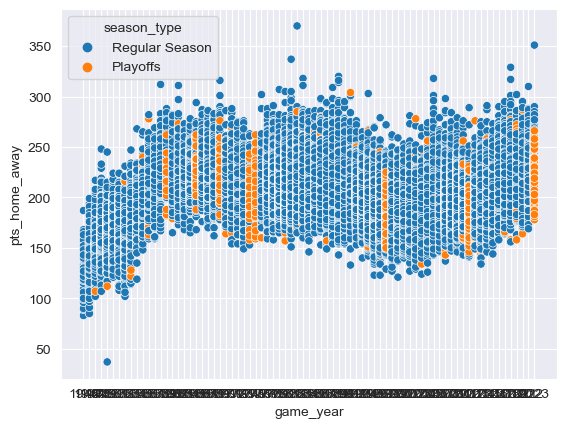

In [43]:
import seaborn as sns

sns.scatterplot(data=df_regular_play_off, x='game_year', y='pts_home_away', hue='season_type')

### Задание 3

Выполните запрос к таблице draft_history, получив датафрейм.

In [44]:
%%sql
SELECT * FROM draft_history;

,person_id,player_name,season,round_number,round_pick,overall_pick,draft_type,team_id,team_city,team_name,team_abbreviation,organization,organization_type,player_profile_flag
0,79299,Clifton McNeeley,1947,1,1,1,Draft,1610610031,Pittsburgh,Ironmen,PIT,Texas-El Paso,College/University,0
1,78109,Glen Selbo,1947,1,2,2,Draft,1610610035,Toronto,Huskies,HUS,Wisconsin,College/University,1
2,76649,Eddie Ehlers,1947,1,3,3,Draft,1610612738,Boston,Celtics,BOS,Purdue,College/University,1
3,79302,Walt Dropo,1947,1,4,4,Draft,1610610032,Providence,Steamrollers,PRO,Connecticut,College/University,0
4,77048,Dick Holub,1947,1,5,5,Draft,1610612752,New York,Knicks,NYK,Long Island-Brooklyn,College/University,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8252,1641771,Jalen Slawson,2023,2,24,54,Draft,1610612758,Sacramento,Kings,SAC,Furman,College/University,1
8253,1631209,Isaiah Wong,2023,2,25,55,Draft,1610612754,Indiana,Pacers,IND,Miami (FL),College/University,1
8254,1641844,Tarik Biberovic,2023,2,26,56,Draft,1610612763,Memphis,Grizzlies,MEM,Fenerbahce S.K. (Turkey),Other Team/Club,1
8255,1631218,Trayce Jackson-Davis,2023,2,27,57,Draft,1610612764,Washington,Wizards,WAS,Indiana,College/University,1


In [45]:
df = df_sql1
df

,person_id,player_name,season,round_number,round_pick,overall_pick,draft_type,team_id,team_city,team_name,team_abbreviation,organization,organization_type,player_profile_flag
0,79299,Clifton McNeeley,1947,1,1,1,Draft,1610610031,Pittsburgh,Ironmen,PIT,Texas-El Paso,College/University,0
1,78109,Glen Selbo,1947,1,2,2,Draft,1610610035,Toronto,Huskies,HUS,Wisconsin,College/University,1
2,76649,Eddie Ehlers,1947,1,3,3,Draft,1610612738,Boston,Celtics,BOS,Purdue,College/University,1
3,79302,Walt Dropo,1947,1,4,4,Draft,1610610032,Providence,Steamrollers,PRO,Connecticut,College/University,0
4,77048,Dick Holub,1947,1,5,5,Draft,1610612752,New York,Knicks,NYK,Long Island-Brooklyn,College/University,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8252,1641771,Jalen Slawson,2023,2,24,54,Draft,1610612758,Sacramento,Kings,SAC,Furman,College/University,1
8253,1631209,Isaiah Wong,2023,2,25,55,Draft,1610612754,Indiana,Pacers,IND,Miami (FL),College/University,1
8254,1641844,Tarik Biberovic,2023,2,26,56,Draft,1610612763,Memphis,Grizzlies,MEM,Fenerbahce S.K. (Turkey),Other Team/Club,1
8255,1631218,Trayce Jackson-Davis,2023,2,27,57,Draft,1610612764,Washington,Wizards,WAS,Indiana,College/University,1


Постройте график, где по оси X будет год, а по оси Y - количество выбранных игроков в этот год (каждая строка в таблице - выбранный игрок).

<Axes: xlabel='season', ylabel='count'>

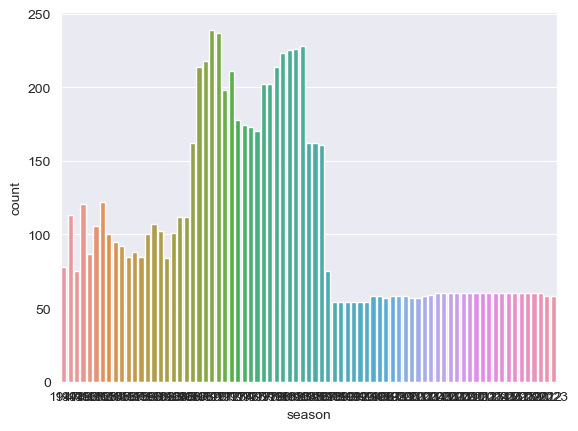

In [46]:
sns.countplot(data=df, x='season')

### Задание 4

Необходимо построить график, показывающий топ 10 школ, игроки из которых были выбраны. Для этого вам понадобятся таблицы common_player_info и draft_history.

In [47]:
%%sql
SELECT * FROM common_player_info;

,person_id,first_name,last_name,display_first_last,display_last_comma_first,display_fi_last,player_slug,birthdate,school,country,...,playercode,from_year,to_year,dleague_flag,nba_flag,games_played_flag,draft_year,draft_round,draft_number,greatest_75_flag
0,76001,Alaa,Abdelnaby,Alaa Abdelnaby,"Abdelnaby, Alaa",A. Abdelnaby,alaa-abdelnaby,1968-06-24 00:00:00,Duke,USA,...,HISTADD_alaa_abdelnaby,1990,1994,N,Y,Y,1990,1,25,N
1,76002,Zaid,Abdul-Aziz,Zaid Abdul-Aziz,"Abdul-Aziz, Zaid",Z. Abdul-Aziz,zaid-abdul-aziz,1946-04-07 00:00:00,Iowa State,USA,...,HISTADD_zaid_abdul-aziz,1968,1977,N,Y,Y,1968,1,5,N
2,76003,Kareem,Abdul-Jabbar,Kareem Abdul-Jabbar,"Abdul-Jabbar, Kareem",K. Abdul-Jabbar,kareem-abdul-jabbar,1947-04-16 00:00:00,UCLA,USA,...,HISTADD_kareem_abdul-jabbar,1969,1988,N,Y,Y,1969,1,1,Y
3,949,Shareef,Abdur-Rahim,Shareef Abdur-Rahim,"Abdur-Rahim, Shareef",S. Abdur-Rahim,shareef-abdur-rahim,1976-12-11 00:00:00,California,USA,...,shareef_abdur-rahim,1996,2007,N,Y,Y,1996,1,3,N
4,76006,Forest,Able,Forest Able,"Able, Forest",F. Able,forest-able,1932-07-27 00:00:00,Western Kentucky,USA,...,HISTADD_frosty_able,1956,1956,N,Y,Y,1956,NaN,NaN,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3627,1627835,Paul,Zipser,Paul Zipser,"Zipser, Paul",P. Zipser,paul-zipser,1994-02-18 00:00:00,Bayern Munich,Germany,...,paul_zipser,2016,2017,Y,Y,Y,2016,2,48,N
3628,1627790,Ante,Zizic,Ante Zizic,"Zizic, Ante",A. Zizic,ante-zizic,1997-01-04 00:00:00,Darussafaka,Croatia,...,ante_zizic,2017,2019,Y,Y,Y,2016,1,23,N
3629,78647,Jim,Zoet,Jim Zoet,"Zoet, Jim",J. Zoet,jim-zoet,1953-12-30 00:00:00,Kent State,USA,...,HISTADD_jim_zoet,1982,1982,N,Y,Y,Undrafted,Undrafted,Undrafted,N
3630,78648,Bill,Zopf,Bill Zopf,"Zopf, Bill",B. Zopf,bill-zopf,1948-06-07 00:00:00,Duquesne,USA,...,HISTADD_zip_zopf,1970,1970,N,Y,Y,1970,2,33,N


In [48]:
%%sql
SELECT * FROM draft_history

,person_id,player_name,season,round_number,round_pick,overall_pick,draft_type,team_id,team_city,team_name,team_abbreviation,organization,organization_type,player_profile_flag
0,79299,Clifton McNeeley,1947,1,1,1,Draft,1610610031,Pittsburgh,Ironmen,PIT,Texas-El Paso,College/University,0
1,78109,Glen Selbo,1947,1,2,2,Draft,1610610035,Toronto,Huskies,HUS,Wisconsin,College/University,1
2,76649,Eddie Ehlers,1947,1,3,3,Draft,1610612738,Boston,Celtics,BOS,Purdue,College/University,1
3,79302,Walt Dropo,1947,1,4,4,Draft,1610610032,Providence,Steamrollers,PRO,Connecticut,College/University,0
4,77048,Dick Holub,1947,1,5,5,Draft,1610612752,New York,Knicks,NYK,Long Island-Brooklyn,College/University,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8252,1641771,Jalen Slawson,2023,2,24,54,Draft,1610612758,Sacramento,Kings,SAC,Furman,College/University,1
8253,1631209,Isaiah Wong,2023,2,25,55,Draft,1610612754,Indiana,Pacers,IND,Miami (FL),College/University,1
8254,1641844,Tarik Biberovic,2023,2,26,56,Draft,1610612763,Memphis,Grizzlies,MEM,Fenerbahce S.K. (Turkey),Other Team/Club,1
8255,1631218,Trayce Jackson-Davis,2023,2,27,57,Draft,1610612764,Washington,Wizards,WAS,Indiana,College/University,1


In [49]:
%%sql
SELECT * 
FROM common_player_info AS C
INNER JOIN main.draft_history dh 
    ON C.person_id = dh.person_id

,person_id,first_name,last_name,display_first_last,display_last_comma_first,display_fi_last,player_slug,birthdate,school,country,...,round_pick,overall_pick,draft_type,team_id.1,team_city.1,team_name.1,team_abbreviation.1,organization,organization_type,player_profile_flag
0,76001,Alaa,Abdelnaby,Alaa Abdelnaby,"Abdelnaby, Alaa",A. Abdelnaby,alaa-abdelnaby,1968-06-24 00:00:00,Duke,USA,...,25,25,Draft,1610612757,Portland,Trail Blazers,POR,Duke,College/University,1
1,76002,Zaid,Abdul-Aziz,Zaid Abdul-Aziz,"Abdul-Aziz, Zaid",Z. Abdul-Aziz,zaid-abdul-aziz,1946-04-07 00:00:00,Iowa State,USA,...,5,5,Draft,1610612758,Cincinnati,Royals,CIN,Iowa State,College/University,1
2,76003,Kareem,Abdul-Jabbar,Kareem Abdul-Jabbar,"Abdul-Jabbar, Kareem",K. Abdul-Jabbar,kareem-abdul-jabbar,1947-04-16 00:00:00,UCLA,USA,...,1,1,Draft,1610612749,Milwaukee,Bucks,MIL,California-Los Angeles,College/University,1
3,949,Shareef,Abdur-Rahim,Shareef Abdur-Rahim,"Abdur-Rahim, Shareef",S. Abdur-Rahim,shareef-abdur-rahim,1976-12-11 00:00:00,California,USA,...,3,3,Draft,1610612763,Vancouver,Grizzlies,VAN,California,College/University,1
4,76006,Forest,Able,Forest Able,"Able, Forest",F. Able,forest-able,1932-07-27 00:00:00,Western Kentucky,USA,...,0,0,Draft,1610612755,Syracuse,Nationals,SYR,Western Kentucky,College/University,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2675,1627757,Stephen,Zimmerman,Stephen Zimmerman,"Zimmerman, Stephen",S. Zimmerman,stephen-zimmerman,1996-09-09 00:00:00,UNLV,USA,...,11,41,Draft,1610612753,Orlando,Magic,ORL,Nevada-Las Vegas,College/University,1
2676,1627835,Paul,Zipser,Paul Zipser,"Zipser, Paul",P. Zipser,paul-zipser,1994-02-18 00:00:00,Bayern Munich,Germany,...,18,48,Draft,1610612741,Chicago,Bulls,CHI,FC Bayern Muenchen,Other Team/Club,1
2677,1627790,Ante,Zizic,Ante Zizic,"Zizic, Ante",A. Zizic,ante-zizic,1997-01-04 00:00:00,Darussafaka,Croatia,...,23,23,Draft,1610612738,Boston,Celtics,BOS,KK Cibona (Croatia),Other Team/Club,1
2678,78648,Bill,Zopf,Bill Zopf,"Zopf, Bill",B. Zopf,bill-zopf,1948-06-07 00:00:00,Duquesne,USA,...,16,33,Draft,1610612749,Milwaukee,Bucks,MIL,Duquesne,College/University,1


In [50]:
df_draft = df_sql4
df_draft['school'].value_counts().head(10)


school
Kentucky          73
UCLA              57
Duke              55
North Carolina    52
Kansas            47
Arizona           45
Louisville        44
Indiana           38
Michigan          37
Michigan State    35
Name: count, dtype: int64

In [51]:
schools = df_draft['school'].value_counts().head(10)
list(schools.index)

['Kentucky',
 'UCLA',
 'Duke',
 'North Carolina',
 'Kansas',
 'Arizona',
 'Louisville',
 'Indiana',
 'Michigan',
 'Michigan State']

In [52]:
df_top_10_school = df_draft[df_draft['school'].isin(schools.index)]
df_top_10_school

,person_id,first_name,last_name,display_first_last,display_last_comma_first,display_fi_last,player_slug,birthdate,school,country,...,round_pick,overall_pick,draft_type,team_id.1,team_city.1,team_name.1,team_abbreviation.1,organization,organization_type,player_profile_flag
0,76001,Alaa,Abdelnaby,Alaa Abdelnaby,"Abdelnaby, Alaa",A. Abdelnaby,alaa-abdelnaby,1968-06-24 00:00:00,Duke,USA,...,25,25,Draft,1610612757,Portland,Trail Blazers,POR,Duke,College/University,1
2,76003,Kareem,Abdul-Jabbar,Kareem Abdul-Jabbar,"Abdul-Jabbar, Kareem",K. Abdul-Jabbar,kareem-abdul-jabbar,1947-04-16 00:00:00,UCLA,USA,...,1,1,Draft,1610612749,Milwaukee,Bucks,MIL,California-Los Angeles,College/University,1
12,201167,Arron,Afflalo,Arron Afflalo,"Afflalo, Arron",A. Afflalo,arron-afflalo,1985-10-15 00:00:00,UCLA,USA,...,27,27,Draft,1610612765,Detroit,Pistons,DET,California-Los Angeles,College/University,1
13,1630534,Ochai,Agbaji,Ochai Agbaji,"Agbaji, Ochai",O. Agbaji,ochai-agbaji,2000-04-20 00:00:00,Kansas,USA,...,14,14,Draft,1610612739,Cleveland,Cavaliers,CLE,Kansas,College/University,1
14,200772,Maurice,Ager,Maurice Ager,"Ager, Maurice",M. Ager,maurice-ager,1984-02-09 00:00:00,Michigan State,USA,...,28,28,Draft,1610612742,Dallas,Mavericks,DAL,Michigan State,College/University,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2642,201153,Julian,Wright,Julian Wright,"Wright, Julian",J. Wright,julian-wright,1987-05-20 00:00:00,Kansas,USA,...,13,13,Draft,1610612740,New Orleans,Hornets,NOH,Kansas,College/University,1
2654,78632,Rich,Yonakor,Rich Yonakor,"Yonakor, Rich",R. Yonakor,rich-yonakor,1958-10-03 00:00:00,North Carolina,USA,...,15,61,Draft,1610612759,San Antonio,Spurs,SAN,North Carolina,College/University,1
2666,203469,Cody,Zeller,Cody Zeller,"Zeller, Cody",C. Zeller,cody-zeller,1992-10-05 00:00:00,Indiana,USA,...,4,4,Draft,1610612766,Charlotte,Bobcats,CHA,Indiana,College/University,1
2669,203092,Tyler,Zeller,Tyler Zeller,"Zeller, Tyler",T. Zeller,tyler-zeller,1990-01-17 00:00:00,North Carolina,USA,...,17,17,Draft,1610612742,Dallas,Mavericks,DAL,North Carolina,College/University,1


<Axes: xlabel='school', ylabel='count'>

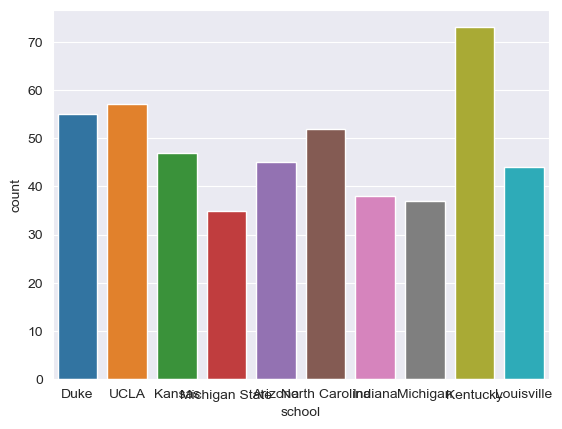

In [53]:
sns.countplot(data=df_top_10_school, x='school')

### Задание 5

Постройте график сравнения выигранных домашних и выездных игр в каждом году. Для этого используйте таблицу game.

In [56]:
df_game = df_sql
df_game

,person_id,player_name,season,round_number,round_pick,overall_pick,draft_type,team_id,team_city,team_name,team_abbreviation,organization,organization_type,player_profile_flag
0,79299,Clifton McNeeley,1947,1,1,1,Draft,1610610031,Pittsburgh,Ironmen,PIT,Texas-El Paso,College/University,0
1,78109,Glen Selbo,1947,1,2,2,Draft,1610610035,Toronto,Huskies,HUS,Wisconsin,College/University,1
2,76649,Eddie Ehlers,1947,1,3,3,Draft,1610612738,Boston,Celtics,BOS,Purdue,College/University,1
3,79302,Walt Dropo,1947,1,4,4,Draft,1610610032,Providence,Steamrollers,PRO,Connecticut,College/University,0
4,77048,Dick Holub,1947,1,5,5,Draft,1610612752,New York,Knicks,NYK,Long Island-Brooklyn,College/University,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8252,1641771,Jalen Slawson,2023,2,24,54,Draft,1610612758,Sacramento,Kings,SAC,Furman,College/University,1
8253,1631209,Isaiah Wong,2023,2,25,55,Draft,1610612754,Indiana,Pacers,IND,Miami (FL),College/University,1
8254,1641844,Tarik Biberovic,2023,2,26,56,Draft,1610612763,Memphis,Grizzlies,MEM,Fenerbahce S.K. (Turkey),Other Team/Club,1
8255,1631218,Trayce Jackson-Davis,2023,2,27,57,Draft,1610612764,Washington,Wizards,WAS,Indiana,College/University,1


In [57]:
df_game['game_year'] = df_game['game_date'].apply(lambda x: x.split('-')[0])
df_game

,season_id,team_id_home,team_abbreviation_home,team_name_home,game_id,game_date,matchup_home,wl_home,min,fgm_home,...,ast_away,stl_away,blk_away,tov_away,pf_away,pts_away,plus_minus_away,video_available_away,season_type,game_year
0,21946,1610610035,HUS,Toronto Huskies,24600001,1946-11-01 00:00:00,HUS vs. NYK,L,0,25.0,...,NaN,NaN,NaN,NaN,NaN,68,2,0,Regular Season,1946
1,21946,1610610034,BOM,St. Louis Bombers,24600003,1946-11-02 00:00:00,BOM vs. PIT,W,0,20.0,...,NaN,NaN,NaN,NaN,25.0,51,-5,0,Regular Season,1946
2,21946,1610610032,PRO,Providence Steamrollers,24600002,1946-11-02 00:00:00,PRO vs. BOS,W,0,21.0,...,NaN,NaN,NaN,NaN,NaN,53,-6,0,Regular Season,1946
3,21946,1610610025,CHS,Chicago Stags,24600004,1946-11-02 00:00:00,CHS vs. NYK,W,0,21.0,...,NaN,NaN,NaN,NaN,22.0,47,-16,0,Regular Season,1946
4,21946,1610610028,DEF,Detroit Falcons,24600005,1946-11-02 00:00:00,DEF vs. WAS,L,0,10.0,...,NaN,NaN,NaN,NaN,NaN,50,17,0,Regular Season,1946
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65693,42022,1610612748,MIA,Miami Heat,42200403,2023-06-07 00:00:00,MIA vs. DEN,L,240,34.0,...,28.0,3.0,5.0,14.0,18.0,109,15,1,Playoffs,2023
65694,42022,1610612748,MIA,Miami Heat,42200404,2023-06-09 00:00:00,MIA vs. DEN,L,240,35.0,...,26.0,11.0,7.0,8.0,18.0,108,13,1,Playoffs,2023
65695,42022,1610612743,DEN,Denver Nuggets,42200405,2023-06-12 00:00:00,DEN vs. MIA,W,240,38.0,...,18.0,9.0,7.0,8.0,21.0,89,-5,1,Playoffs,2023
65696,32022,1610616834,LBN,Team LeBron,32200001,2023-02-19 00:00:00,LBN vs. GNS,L,221,79.0,...,43.0,8.0,1.0,12.0,2.0,184,9,1,All-Star,2023


<Axes: xlabel='game_year', ylabel='pts_away'>

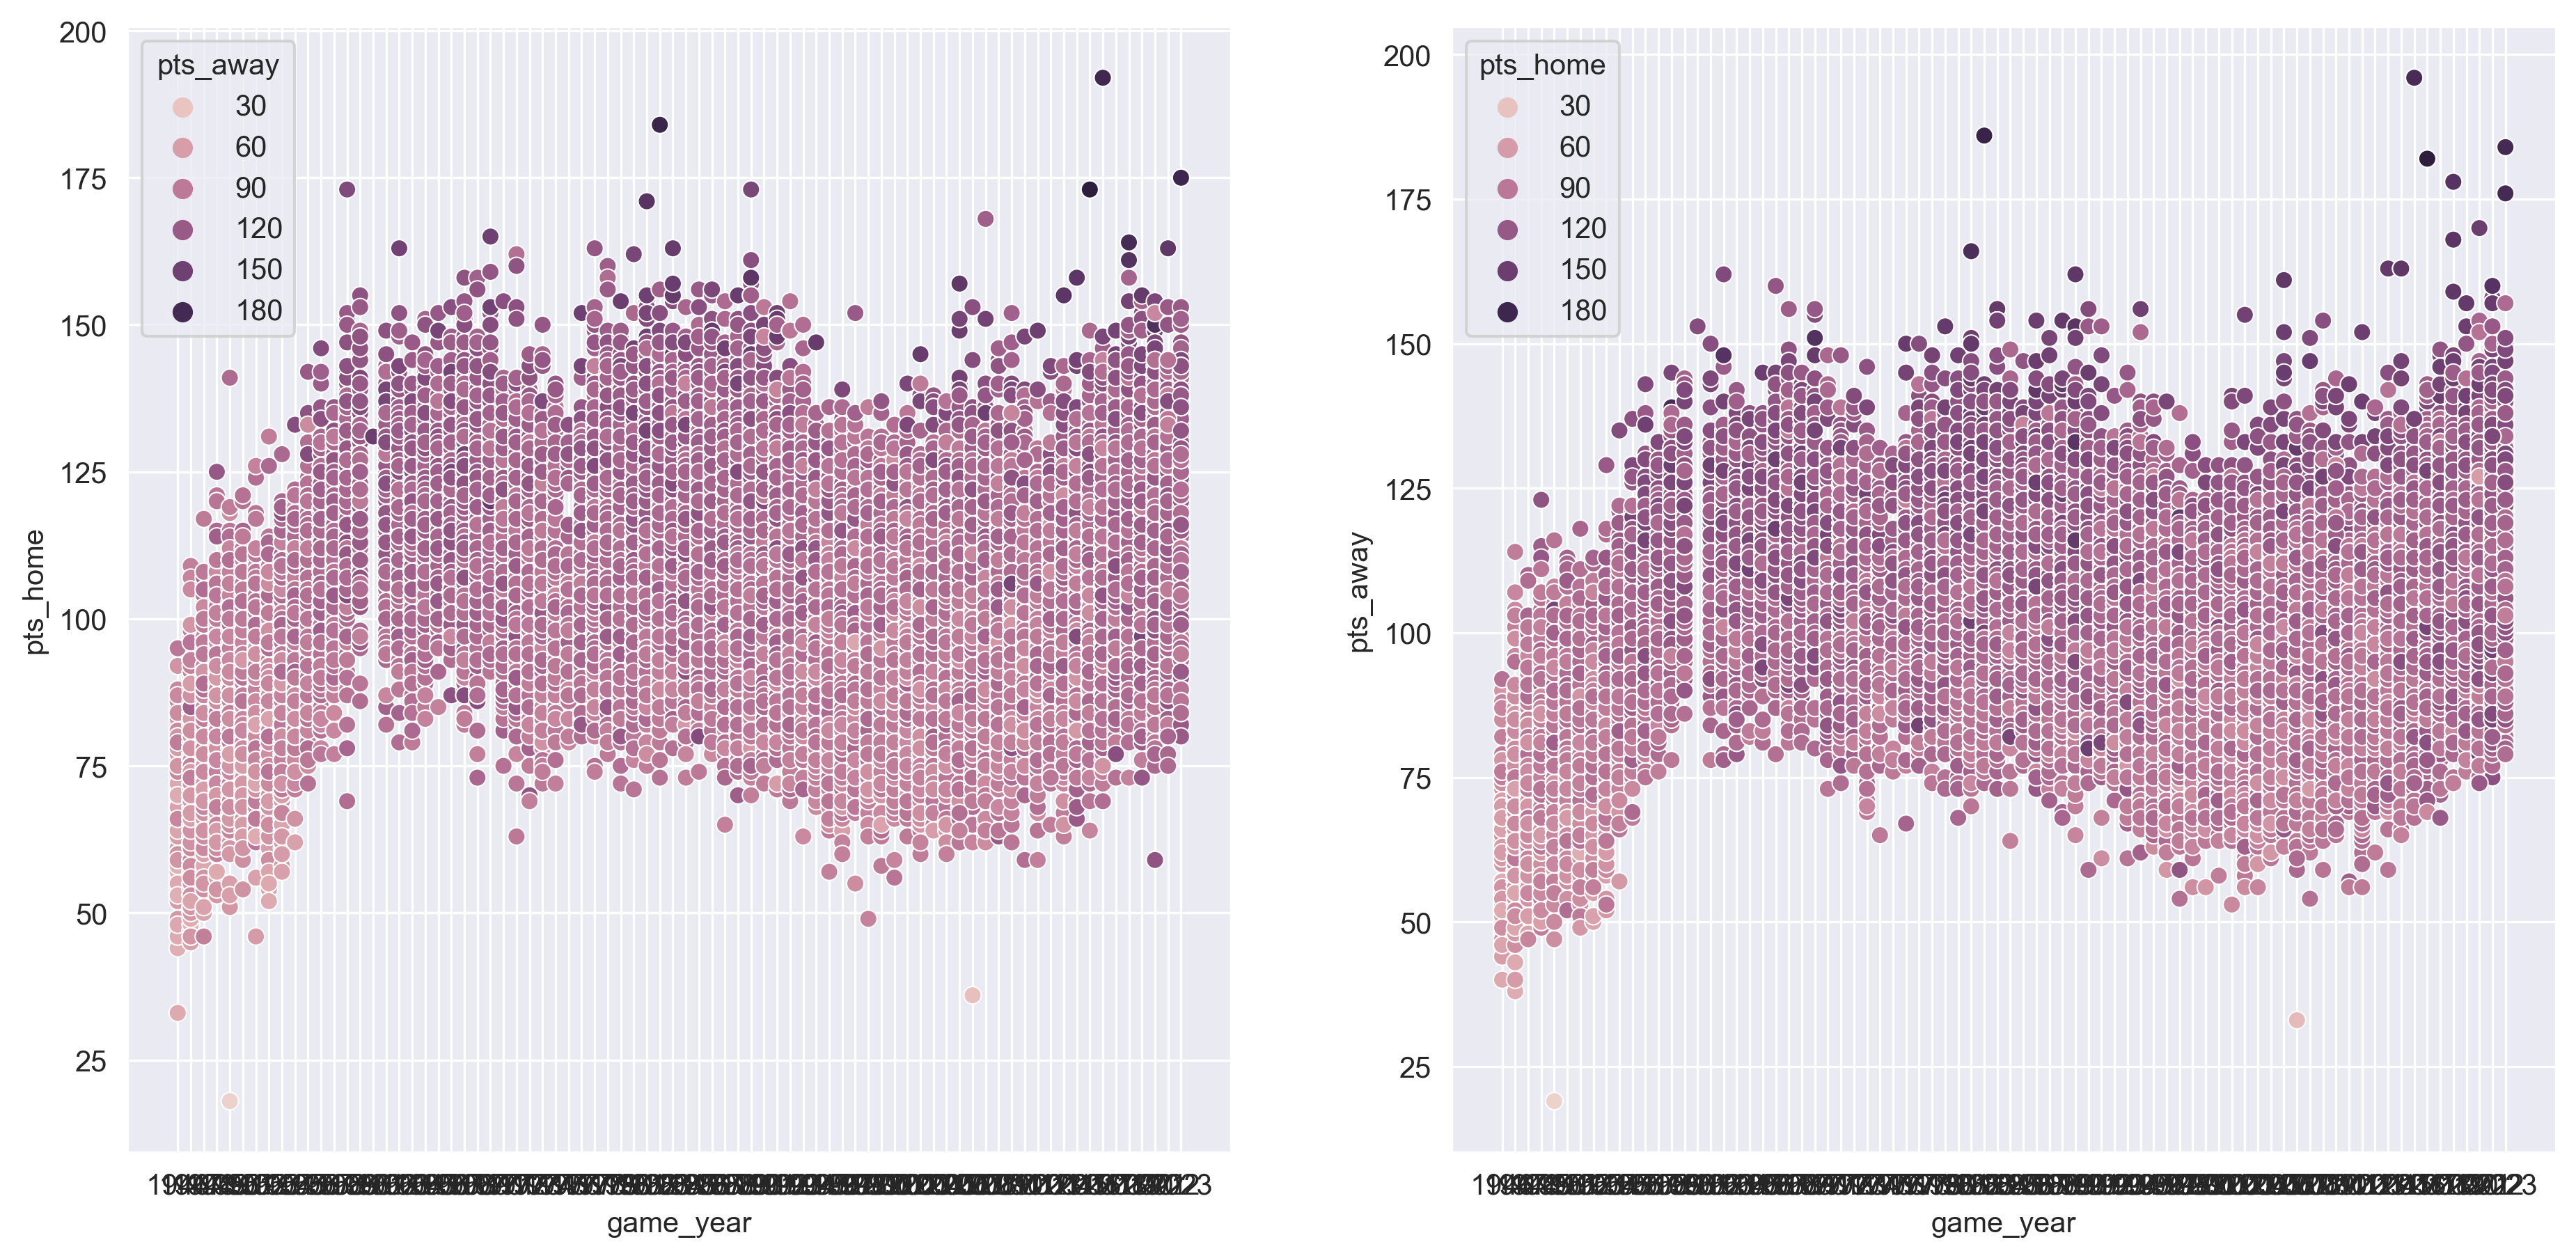

In [59]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 2, figsize=(15,7), dpi=300)

sns.scatterplot(data=df_game, x='game_year', y='pts_home', hue='pts_away', ax=axes[0])
sns.scatterplot(data=df_game, x='game_year', y='pts_away', hue='pts_home', ax=axes[1])


### Задание 6

Какова средняя продолжительность карьеры активного игрока NBA? Используйте таблицы common_player_info и player. Активный игрок - это тот, у которого в колонке is_active стоит 1.

In [60]:
%%sql
SELECT * FROM common_player_info;

,person_id,first_name,last_name,display_first_last,display_last_comma_first,display_fi_last,player_slug,birthdate,school,country,...,playercode,from_year,to_year,dleague_flag,nba_flag,games_played_flag,draft_year,draft_round,draft_number,greatest_75_flag
0,76001,Alaa,Abdelnaby,Alaa Abdelnaby,"Abdelnaby, Alaa",A. Abdelnaby,alaa-abdelnaby,1968-06-24 00:00:00,Duke,USA,...,HISTADD_alaa_abdelnaby,1990,1994,N,Y,Y,1990,1,25,N
1,76002,Zaid,Abdul-Aziz,Zaid Abdul-Aziz,"Abdul-Aziz, Zaid",Z. Abdul-Aziz,zaid-abdul-aziz,1946-04-07 00:00:00,Iowa State,USA,...,HISTADD_zaid_abdul-aziz,1968,1977,N,Y,Y,1968,1,5,N
2,76003,Kareem,Abdul-Jabbar,Kareem Abdul-Jabbar,"Abdul-Jabbar, Kareem",K. Abdul-Jabbar,kareem-abdul-jabbar,1947-04-16 00:00:00,UCLA,USA,...,HISTADD_kareem_abdul-jabbar,1969,1988,N,Y,Y,1969,1,1,Y
3,949,Shareef,Abdur-Rahim,Shareef Abdur-Rahim,"Abdur-Rahim, Shareef",S. Abdur-Rahim,shareef-abdur-rahim,1976-12-11 00:00:00,California,USA,...,shareef_abdur-rahim,1996,2007,N,Y,Y,1996,1,3,N
4,76006,Forest,Able,Forest Able,"Able, Forest",F. Able,forest-able,1932-07-27 00:00:00,Western Kentucky,USA,...,HISTADD_frosty_able,1956,1956,N,Y,Y,1956,NaN,NaN,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3627,1627835,Paul,Zipser,Paul Zipser,"Zipser, Paul",P. Zipser,paul-zipser,1994-02-18 00:00:00,Bayern Munich,Germany,...,paul_zipser,2016,2017,Y,Y,Y,2016,2,48,N
3628,1627790,Ante,Zizic,Ante Zizic,"Zizic, Ante",A. Zizic,ante-zizic,1997-01-04 00:00:00,Darussafaka,Croatia,...,ante_zizic,2017,2019,Y,Y,Y,2016,1,23,N
3629,78647,Jim,Zoet,Jim Zoet,"Zoet, Jim",J. Zoet,jim-zoet,1953-12-30 00:00:00,Kent State,USA,...,HISTADD_jim_zoet,1982,1982,N,Y,Y,Undrafted,Undrafted,Undrafted,N
3630,78648,Bill,Zopf,Bill Zopf,"Zopf, Bill",B. Zopf,bill-zopf,1948-06-07 00:00:00,Duquesne,USA,...,HISTADD_zip_zopf,1970,1970,N,Y,Y,1970,2,33,N


In [61]:
%%sql
SELECT * FROM player

,id,full_name,first_name,last_name,is_active
0,76001,Alaa Abdelnaby,Alaa,Abdelnaby,0
1,76002,Zaid Abdul-Aziz,Zaid,Abdul-Aziz,0
2,76003,Kareem Abdul-Jabbar,Kareem,Abdul-Jabbar,0
3,51,Mahmoud Abdul-Rauf,Mahmoud,Abdul-Rauf,0
4,1505,Tariq Abdul-Wahad,Tariq,Abdul-Wahad,0
...,...,...,...,...,...
4810,1627790,Ante Zizic,Ante,Zizic,0
4811,78647,Jim Zoet,Jim,Zoet,0
4812,78648,Bill Zopf,Bill,Zopf,0
4813,1627826,Ivica Zubac,Ivica,Zubac,1


In [71]:
df_sql7[df_sql7['is_active'] == 1]

,id,full_name,first_name,last_name,is_active
10,1630173,Precious Achiuwa,Precious,Achiuwa,1
22,203500,Steven Adams,Steven,Adams,1
24,1628389,Bam Adebayo,Bam,Adebayo,1
29,1630534,Ochai Agbaji,Ochai,Agbaji,1
41,1630583,Santi Aldama,Santi,Aldama,1
...,...,...,...,...,...
4790,201152,Thaddeus Young,Thaddeus,Young,1
4792,1629027,Trae Young,Trae,Young,1
4793,1630209,Omer Yurtseven,Omer,Yurtseven,1
4796,203469,Cody Zeller,Cody,Zeller,1


In [68]:
%%sql
SELECT * 
FROM common_player_info AS C
INNER JOIN main.player p 
    ON C.person_id = p.id

,person_id,first_name,last_name,display_first_last,display_last_comma_first,display_fi_last,player_slug,birthdate,school,country,...,games_played_flag,draft_year,draft_round,draft_number,greatest_75_flag,id,full_name,first_name.1,last_name.1,is_active
0,76001,Alaa,Abdelnaby,Alaa Abdelnaby,"Abdelnaby, Alaa",A. Abdelnaby,alaa-abdelnaby,1968-06-24 00:00:00,Duke,USA,...,Y,1990,1,25,N,76001,Alaa Abdelnaby,Alaa,Abdelnaby,0
1,76002,Zaid,Abdul-Aziz,Zaid Abdul-Aziz,"Abdul-Aziz, Zaid",Z. Abdul-Aziz,zaid-abdul-aziz,1946-04-07 00:00:00,Iowa State,USA,...,Y,1968,1,5,N,76002,Zaid Abdul-Aziz,Zaid,Abdul-Aziz,0
2,76003,Kareem,Abdul-Jabbar,Kareem Abdul-Jabbar,"Abdul-Jabbar, Kareem",K. Abdul-Jabbar,kareem-abdul-jabbar,1947-04-16 00:00:00,UCLA,USA,...,Y,1969,1,1,Y,76003,Kareem Abdul-Jabbar,Kareem,Abdul-Jabbar,0
3,949,Shareef,Abdur-Rahim,Shareef Abdur-Rahim,"Abdur-Rahim, Shareef",S. Abdur-Rahim,shareef-abdur-rahim,1976-12-11 00:00:00,California,USA,...,Y,1996,1,3,N,949,Shareef Abdur-Rahim,Shareef,Abdur-Rahim,0
4,76006,Forest,Able,Forest Able,"Able, Forest",F. Able,forest-able,1932-07-27 00:00:00,Western Kentucky,USA,...,Y,1956,NaN,NaN,N,76006,Forest Able,Forest,Able,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3627,1627835,Paul,Zipser,Paul Zipser,"Zipser, Paul",P. Zipser,paul-zipser,1994-02-18 00:00:00,Bayern Munich,Germany,...,Y,2016,2,48,N,1627835,Paul Zipser,Paul,Zipser,0
3628,1627790,Ante,Zizic,Ante Zizic,"Zizic, Ante",A. Zizic,ante-zizic,1997-01-04 00:00:00,Darussafaka,Croatia,...,Y,2016,1,23,N,1627790,Ante Zizic,Ante,Zizic,0
3629,78647,Jim,Zoet,Jim Zoet,"Zoet, Jim",J. Zoet,jim-zoet,1953-12-30 00:00:00,Kent State,USA,...,Y,Undrafted,Undrafted,Undrafted,N,78647,Jim Zoet,Jim,Zoet,0
3630,78648,Bill,Zopf,Bill Zopf,"Zopf, Bill",B. Zopf,bill-zopf,1948-06-07 00:00:00,Duquesne,USA,...,Y,1970,2,33,N,78648,Bill Zopf,Bill,Zopf,0


In [69]:
df_active = df_sql8[df_sql8['is_active'] == 1]
df_active['career'] = df_active[['from_year', 'to_year']].apply(lambda df: df['to_year'] - df['from_year'], axis=1)
df_active


C:\Users\sanya\AppData\Local\Temp\ipykernel_11352\225224899.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_active['career'] = df_active[['from_year', 'to_year']].apply(lambda df: df['to_year'] - df['from_year'], axis=1)


,person_id,first_name,last_name,display_first_last,display_last_comma_first,display_fi_last,player_slug,birthdate,school,country,...,draft_year,draft_round,draft_number,greatest_75_flag,id,full_name,first_name.1,last_name.1,is_active,career
7,1630173,Precious,Achiuwa,Precious Achiuwa,"Achiuwa, Precious",P. Achiuwa,precious-achiuwa,1999-09-19 00:00:00,Memphis,Nigeria,...,2020,1,20,N,1630173,Precious Achiuwa,Precious,Achiuwa,1,3
12,203500,Steven,Adams,Steven Adams,"Adams, Steven",S. Adams,steven-adams,1993-07-20 00:00:00,Pittsburgh,New Zealand,...,2013,1,12,N,203500,Steven Adams,Steven,Adams,1,10
16,1630534,Ochai,Agbaji,Ochai Agbaji,"Agbaji, Ochai",O. Agbaji,ochai-agbaji,2000-04-20 00:00:00,Kansas,USA,...,2022,1,14,N,1630534,Ochai Agbaji,Ochai,Agbaji,1,1
23,1630583,Santi,Aldama,Santi Aldama,"Aldama, Santi",S. Aldama,santi-aldama,2001-01-10 00:00:00,Loyola-Maryland,Spain,...,2021,1,30,N,1630583,Santi Aldama,Santi,Aldama,1,2
34,1628960,Grayson,Allen,Grayson Allen,"Allen, Grayson",G. Allen,grayson-allen,1995-10-08 00:00:00,Duke,USA,...,2018,1,21,N,1628960,Grayson Allen,Grayson,Allen,1,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3610,201152,Thaddeus,Young,Thaddeus Young,"Young, Thaddeus",T. Young,thaddeus-young,1988-06-21 00:00:00,Georgia Tech,USA,...,2007,1,12,N,201152,Thaddeus Young,Thaddeus,Young,1,16
3612,1629027,Trae,Young,Trae Young,"Young, Trae",T. Young,trae-young,1998-09-19 00:00:00,Oklahoma,USA,...,2018,1,5,N,1629027,Trae Young,Trae,Young,1,5
3613,1630209,Omer,Yurtseven,Omer Yurtseven,"Yurtseven, Omer",O. Yurtseven,omer-yurtseven,1998-06-19 00:00:00,Georgetown,Turkey,...,Undrafted,Undrafted,Undrafted,N,1630209,Omer Yurtseven,Omer,Yurtseven,1,3
3616,203469,Cody,Zeller,Cody Zeller,"Zeller, Cody",C. Zeller,cody-zeller,1992-10-05 00:00:00,Indiana,USA,...,2013,1,4,N,203469,Cody Zeller,Cody,Zeller,1,10


In [72]:
df_active['career'].describe()

count    420.000000
mean       5.121429
std        4.033513
min        0.000000
25%        2.000000
50%        4.000000
75%        7.000000
max       20.000000
Name: career, dtype: float64

### Задание 7

Каково соотношение позиций, на которых играют игроки? Используйте таблицу common_player_info.

In [73]:
df_sql6

,person_id,first_name,last_name,display_first_last,display_last_comma_first,display_fi_last,player_slug,birthdate,school,country,...,playercode,from_year,to_year,dleague_flag,nba_flag,games_played_flag,draft_year,draft_round,draft_number,greatest_75_flag
0,76001,Alaa,Abdelnaby,Alaa Abdelnaby,"Abdelnaby, Alaa",A. Abdelnaby,alaa-abdelnaby,1968-06-24 00:00:00,Duke,USA,...,HISTADD_alaa_abdelnaby,1990,1994,N,Y,Y,1990,1,25,N
1,76002,Zaid,Abdul-Aziz,Zaid Abdul-Aziz,"Abdul-Aziz, Zaid",Z. Abdul-Aziz,zaid-abdul-aziz,1946-04-07 00:00:00,Iowa State,USA,...,HISTADD_zaid_abdul-aziz,1968,1977,N,Y,Y,1968,1,5,N
2,76003,Kareem,Abdul-Jabbar,Kareem Abdul-Jabbar,"Abdul-Jabbar, Kareem",K. Abdul-Jabbar,kareem-abdul-jabbar,1947-04-16 00:00:00,UCLA,USA,...,HISTADD_kareem_abdul-jabbar,1969,1988,N,Y,Y,1969,1,1,Y
3,949,Shareef,Abdur-Rahim,Shareef Abdur-Rahim,"Abdur-Rahim, Shareef",S. Abdur-Rahim,shareef-abdur-rahim,1976-12-11 00:00:00,California,USA,...,shareef_abdur-rahim,1996,2007,N,Y,Y,1996,1,3,N
4,76006,Forest,Able,Forest Able,"Able, Forest",F. Able,forest-able,1932-07-27 00:00:00,Western Kentucky,USA,...,HISTADD_frosty_able,1956,1956,N,Y,Y,1956,NaN,NaN,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3627,1627835,Paul,Zipser,Paul Zipser,"Zipser, Paul",P. Zipser,paul-zipser,1994-02-18 00:00:00,Bayern Munich,Germany,...,paul_zipser,2016,2017,Y,Y,Y,2016,2,48,N
3628,1627790,Ante,Zizic,Ante Zizic,"Zizic, Ante",A. Zizic,ante-zizic,1997-01-04 00:00:00,Darussafaka,Croatia,...,ante_zizic,2017,2019,Y,Y,Y,2016,1,23,N
3629,78647,Jim,Zoet,Jim Zoet,"Zoet, Jim",J. Zoet,jim-zoet,1953-12-30 00:00:00,Kent State,USA,...,HISTADD_jim_zoet,1982,1982,N,Y,Y,Undrafted,Undrafted,Undrafted,N
3630,78648,Bill,Zopf,Bill Zopf,"Zopf, Bill",B. Zopf,bill-zopf,1948-06-07 00:00:00,Duquesne,USA,...,HISTADD_zip_zopf,1970,1970,N,Y,Y,1970,2,33,N


<Axes: xlabel='position', ylabel='count'>

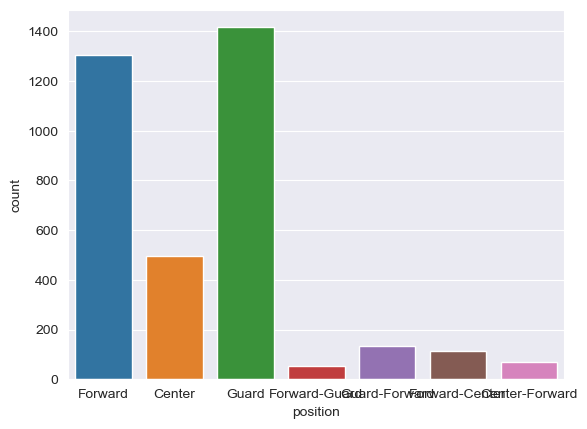

In [75]:
sns.countplot(data=df_sql6, x='position')